In [2]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter
stop_words = set(stopwords.words('english')) 
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
stemmer = ps()
from nltk.stem.cistem import Cistem
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
import seaborn

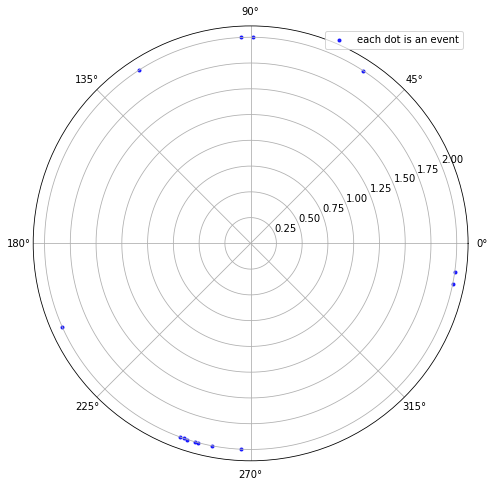

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
np.random.seed(19680801)
# data points
N = 14
# fixed radius of the points, here its 2
r1 = [2 for i in range(N)] #2 * np.random.rand(N)
# these are for the hour map to degree radians
theta1 = 2 * np.pi * np.random.rand(N)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta1, r1, marker='.',c='blue', cmap='hsv', alpha=0.85,label='each dot is an event')
plt.legend()

In [4]:
DATA = '/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/8_41.csv'
df = pd.read_csv(DATA)
data = df[(df['months'] == 3) | (df['months'] == 4) | (df['months'] == 5) & (df['years'] == 2020) ].dropna(subset=['query'])

data['query'].tolist()

['flights from BOS to LIM on Mar 6, 2020 returning Mar 16, 2020',
 'salsa antigua',
 'una noche de copas una noche loca',
 'Maria Conchita Alonso - Noche De Copas - YouTube',
 'Salsa Sensual MIX VOL. 3 [De los 80] (UNA HORA COMPLETA DE ...',
 'greyhound',
 'buffalo',
 'Rochester to Buffalo - 2 ways to travel via bus, and car - Rome2rio',
 'how to go from rochester to buffalo',
 'The Trump Administration Is Denying H-1B Visas at a Dizzying Rate ...',
 'h1b visa extension denial rate',
 'mauricio mesones',
 'Grupo para conocer peruanos en Rochester, expatriados peruanos ...',
 'https://www.yelp.com/search?find_desc=Peruvian+Food&find_loc=Rochester%2C+NY',
 'peruanos en rochester',
 'indignada translate',
 'queso panela',
 'fabian caceres chile',
 'Jetblue Cookies - Belgian Boys',
 'stroopwafel jetblue',
 'dell inspiron headphone jack not working',
 'Headphones jack not working - Dell Community',
 'Solved: Inspiron 15-7???, not detecting headphones - Dell Community',
 'vicks mentholatum',

In [6]:
def df_jan_feb(df):
    return df[(df['months'] == 1) | (df['months'] == 2) & (df['years'] == 2020) ].dropna(subset=['query'])

def df_mar_ap(df):
    return df[(df['months'] == 3) | (df['months'] == 4) | (df['months'] == 5) | (df['months'] == 6) & (df['years'] == 2020) ].dropna(subset=['query'])

#Tokenizes/stems the queries in a df
def tokenize_stem(df):
    searches = df['query'].tolist()
    tokens = []
    punct_list ={'-',':','&','|', 'https', 'http', '...', ',', '?', '+', '(', ')', '*', '$', '@', '%', '^', '~', '.', '=', 'x', '\'s', 'u', 'r'}
    for q in searches:
        sublist = word_tokenize(q)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(token)
    return tokens
#Tokenizes/stems queries in list
def tokenize_list(searches):
    tokens = []
    punct_list ={'-',':','&','|', 'https', 'http', '...', ',', '?', '+', '(', ')', '*', '$', '@', '%', '^', '~', '.', '=', 'x', '\'s', 'u', 'r'}
    for q in searches:
        sublist = word_tokenize(q)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(token)
    return tokens

                  
#List of top terms 

def top_ten(searchlist):
    df = pd.Series(searchlist).value_counts().sort_values(ascending = False).to_frame().reset_index()
    df_new = df.rename(columns={'index':'words'})
    df_new = df_new.head(10)
    return df_new['words'].tolist()

#Creates two dicts

def gen_dict():
    count_dict = {}
    categories = ['News & Politics & Society','Living & Well-being','Adult & Sensitive & Illegal','Health & Fitness','Arts & Entertainment','Finance & Business','Jobs & Education','neutral','Science & Tech.',"Sports"]
    for category in categories:
        timeCounts = {}
        for hour in range(0,24):
            timeCounts[hour] = 0
        count_dict[category] = timeCounts
    return count_dict   

#Gets weekly distribution for top ten terms- wrapper function

def get_cat(df):
    merged_categories = {'Adult' : 'Adult & Sensitive & Illegal',
     'American Cuisine' : 'Living & Well-being',
     'American Football' : 'Sports',
     'Arts & Entertainment' : 'Arts & Entertainment',
     'Automotive' : 'Science & Tech.',
     'Autos & Vehicles' : 'Science & Tech.',
     'Basketball' : 'Sports',
     'Beauty & Fitness' : 'Health & Fitness',
     'Books & Literature' : 'Arts & Entertainment',
     'Business' : 'Finance & Business',
     'Business & Industrial' : 'Finance & Business',
     'Buying' : 'Living & Well-being',
     'Careers' : 'Jobs & Education',
     'Comedy' : 'Arts & Entertainment',
     'Computers & Electronics' : 'Science & Tech.',
     'Content Server' : 'neutral',
     'Couponing' : 'Living & Well-being',
     'Desserts & Baking' : 'Living & Well-being',
     'Education' : 'Jobs & Education',
     'English as a 2nd Language' : 'Jobs & Education',
     'Entertainment' : 'Arts & Entertainment',
     'Family & Parenting' : 'Living & Well-being',
     'Film & Animation' : 'Arts & Entertainment',
     'Finance' : 'Finance & Business',
     'Food & Drink' : 'Living & Well-being',
     'Games' : 'Arts & Entertainment',
     'Gaming' : 'Arts & Entertainment',
     'Health' : 'Health & Fitness',
     'Health & Fitness' : 'Health & Fitness',
     'Hobbies & Interests' : 'Living & Well-being',
     'Hobbies & Leisure' : 'Living & Well-being',
     'Home & Garden' : 'Living & Well-being',
     'Howto & Style' : 'Living & Well-being',
     'Humor' : 'Arts & Entertainment',
     'Illegal Content' : 'Adult & Sensitive & Illegal',
     'Internet & Telecom' : 'Science & Tech.',
     'Jobs & Education' : 'Jobs & Education',
     'Law & Government' : 'News & Politics & Society',
     'Law, Government, & Politics' : 'News & Politics & Society',
     'Mac Support' : 'Science & Tech.',
     'Movies' : 'Arts & Entertainment',
     'Music' : 'Arts & Entertainment',
     'News' : 'News & Politics & Society',
     'News & Politics' : 'News & Politics & Society',
     'Non-Standard Content' : 'Adult & Sensitive & Illegal',
     'Nonprofits & Activism' : 'News & Politics & Society',
     'Online Communities' : 'Living & Well-being',
     'PC Support' : 'Science & Tech.',
     'People & Blogs' : 'News & Politics & Society',
     'People & Society' : 'News & Politics & Society',
     'Personal Finance' : 'Finance & Business',
     'Pets' : 'Living & Well-being',
     'Pets & Animals' : 'Living & Well-being',
     'Politics' : 'News & Politics & Society',
     'Real Estate' : 'Finance & Business',
     'Reference' : 'Jobs & Education',
     'Religion & Spirituality' : 'Health & Fitness',
     'Science' : 'Science & Tech.',
     'Science & Technology' : 'Science & Tech.',
     'Sensitive Subjects' : 'Adult & Sensitive & Illegal',
     'Shopping' : 'Living & Well-being',
     'Society' : 'News & Politics & Society',
     'Sports' : 'Sports',
     'Style & Fashion' : 'Living & Well-being',
     'Technology & Computing' : 'Science & Tech.',
     'Television & Video' : 'Arts & Entertainment',
     'Tennis' : 'Sports',
     'Travel' : 'Living & Well-being',
     'Travel & Events' : 'Living & Well-being',
     'Uncategorized' : 'neutral',
     'Unmoderated UGC' : 'neutral',
     'Web Design' : 'Science & Tech.',
     'Web Search' : 'neutral'}
    df["category"] = df["category"].apply(lambda x: merged_categories[x])
    return df


def get_counts(data):
    df_hour_cat = df[(df['category'] == "Sports") &(df['hour'] == 0)]
